In [1]:
import numpy as np
import pandas as pd

### Loading the Dataset

In [2]:
df = pd.read_csv("data.csv",encoding = 'ISO-8859-1')

In [3]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
179294,552269,22766,PHOTO FRAME CORNICE,2,5/8/2011 11:52,2.95,16121.0,United Kingdom
34680,539419,22219,LOVEBIRD HANGING DECORATION WHITE,12,12/17/2010 14:10,0.85,12431.0,Australia
306880,563848,23269,SET OF 2 CERAMIC CHRISTMAS TREES,12,8/19/2011 14:57,1.45,14911.0,EIRE
360708,568301,22111,SCOTTIE DOG HOT WATER BOTTLE,2,9/26/2011 12:45,4.95,16383.0,United Kingdom
173893,551724,84378,SET OF 3 HEART COOKIE CUTTERS,2,5/3/2011 17:12,1.25,15976.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
for column in df.columns:
    print(column)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


## Data Cleaning

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Checking missing values count on each column, applying sorting

In [11]:
df.isnull().sum().sort_values()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Description      1454
CustomerID     135080
dtype: int64

In [12]:
df.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

### Converting InvoiceDate data type to datetime data type

In [13]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [14]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df.Description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [18]:
df.Description.str.lower()

0          white hanging heart t-light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
541904            pack of 20 spaceboy napkins
541905           children's apron dolly girl 
541906          childrens cutlery dolly girl 
541907        childrens cutlery circus parade
541908          baking set 9 piece retrospot 
Name: Description, Length: 541909, dtype: object

In [19]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
72645,542255,22740,POLKADOT PEN,9,2011-01-26 16:43:00,1.63,NaN,United Kingdom


In [20]:
df['Description'] = df.Description.str.lower()

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dropping missing values

In [22]:
df_new = df.dropna()

In [23]:
df_new.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Converting CustomerID float type into integer type

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
df_new['CustomerID'] = df_new['CustomerID'].astype('int64')

In [26]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [28]:
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [29]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


#### Conclusion is: quantity column having negative values
So, we need to remove/delete negative values

### Remove negative values from quantity column

In [30]:
df_new.Quantity > 0

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: Quantity, Length: 406829, dtype: bool

In [31]:
Quan1 = df_new.Quantity > 0

In [32]:
df_new = df_new[Quan1]

In [33]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [34]:
df_new.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


In [35]:
df_new.shape

(397924, 8)

## Adding the column - amount_spent

In [36]:
df_new['amount_spent'] = df_new['Quantity'] * df_new['UnitPrice']

In [37]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [38]:
df_new['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [39]:
for col in df_new.columns:
    print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
amount_spent


## Rearranging columns for more readability

In [40]:
col_order = ['InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','amount_spent','CustomerID','Country']

In [41]:
df_new = df_new[col_order]

## Access initial data

In [42]:
df_new.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [43]:
df_new.shape

(397924, 9)

## Let us do analysis on InvoiceDate column 

In [44]:
df_new['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

In [45]:
#accessing year value from Invoicedate

In [46]:
df_new['InvoiceDate'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 397924, dtype: int64

In [47]:
df_new['InvoiceDate'].dt.year.value_counts()

2011    371764
2010     26160
Name: InvoiceDate, dtype: int64

In [48]:
df_new['InvoiceDate'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 397924, dtype: int64

In [49]:
df_new['InvoiceDate'].dt.month.value_counts()

11    64545
10    49557
12    43464
9     40030
5     28322
6     27185
3     27177
8     27013
7     26827
4     22644
1     21232
2     19928
Name: InvoiceDate, dtype: int64

In [50]:
df_new.head(2)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom


## Lets insert year_month column in 2nd index position

In [51]:
y = 2010
m = 12
y_m = 100*2010 + 12
y_m

201012

In [52]:
c1 = 'year_month'

In [53]:
v1 = df_new['InvoiceDate'].map(lambda col: 100*(col.year) + col.month)

In [54]:
df_new.insert(loc=2, column = c1, value=v1)

In [55]:
df_new

,InvoiceNo,InvoiceDate,year_month,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,201112,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France
541905,581587,2011-12-09 12:50:00,201112,22899,children's apron dolly girl,6,2.10,12.60,12680,France
541906,581587,2011-12-09 12:50:00,201112,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France
541907,581587,2011-12-09 12:50:00,201112,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France


In [56]:
df_new.head()

,InvoiceNo,InvoiceDate,year_month,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


## Adding month column to existing DataFrame

In [57]:
c2 = 'month'

In [58]:
v2 = df_new.InvoiceDate.dt.month

In [59]:
df_new.insert(loc = 3, column = c2, value = v2)

In [60]:
df_new.head()

,InvoiceNo,InvoiceDate,year_month,month,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [61]:
# we can get day of the week

In [62]:
df_new.InvoiceDate.dt.dayofweek

0         2
1         2
2         2
3         2
4         2
         ..
541904    4
541905    4
541906    4
541907    4
541908    4
Name: InvoiceDate, Length: 397924, dtype: int64

### In pandas, the day format starts from 0 to 6
Monday = 0 Tuesday=1,...Sunday=6

### Apply +1 to make Monday = 1...until Sunday = 7

In [63]:
c3 = 'day'

In [64]:
v3 = (df_new.InvoiceDate.dt.dayofweek)+1

In [65]:
df_new.insert(loc=4, column=c3, value=v3)

In [66]:
df_new.head()

,InvoiceNo,InvoiceDate,year_month,month,day,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


### Adding hour column to existing DataFrame

In [67]:
c4 = 'hour'

In [68]:
v4 = df_new.InvoiceDate.dt.hour

In [69]:
df_new.insert(loc=5, column=c4, value=v4)

In [70]:
df_new.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [71]:
# Lets display all columns
df_new.columns

Index(['InvoiceNo', 'InvoiceDate', 'year_month', 'month', 'day', 'hour',
       'StockCode', 'Description', 'Quantity', 'UnitPrice', 'amount_spent',
       'CustomerID', 'Country'],
      dtype='object')

## Exploratory data analysis (EDA)

In [72]:
df_new.groupby(by = ['CustomerID']).count()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent,Country
CustomerID,,,,,,,,,,,,
12346,1,1,1,1,1,1,1,1,1,1,1,1
12347,182,182,182,182,182,182,182,182,182,182,182,182
12348,31,31,31,31,31,31,31,31,31,31,31,31
12349,73,73,73,73,73,73,73,73,73,73,73,73
12350,17,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...
18280,10,10,10,10,10,10,10,10,10,10,10,10
18281,7,7,7,7,7,7,7,7,7,7,7,7
18282,12,12,12,12,12,12,12,12,12,12,12,12


In [73]:
df_new.groupby(by=['CustomerID','Country']).count()

,,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent
CustomerID,Country,,,,,,,,,,,
12346,United Kingdom,1,1,1,1,1,1,1,1,1,1,1
12347,Iceland,182,182,182,182,182,182,182,182,182,182,182
12348,Finland,31,31,31,31,31,31,31,31,31,31,31
12349,Italy,73,73,73,73,73,73,73,73,73,73,73
12350,Norway,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...
18280,United Kingdom,10,10,10,10,10,10,10,10,10,10,10
18281,United Kingdom,7,7,7,7,7,7,7,7,7,7,7
18282,United Kingdom,12,12,12,12,12,12,12,12,12,12,12


In [74]:
df_new.groupby(by = ['CustomerID','Country'])['InvoiceNo'].count()

CustomerID  Country       
12346       United Kingdom      1
12347       Iceland           182
12348       Finland            31
12349       Italy              73
12350       Norway             17
                             ... 
18280       United Kingdom     10
18281       United Kingdom      7
18282       United Kingdom     12
18283       United Kingdom    756
18287       United Kingdom     70
Name: InvoiceNo, Length: 4347, dtype: int64

In [75]:
df_new.groupby(by = ['CustomerID','Country'],as_index = False)['InvoiceNo'].count()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,756


In [76]:
df_new.groupby(by = ['CustomerID','Country'],as_index = False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


## Data visualization

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

In [79]:
orders

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,756


## Check top 5 most number of orders

In [80]:
orders.sort_values(by = 'InvoiceNo', ascending = False).head()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


## Visualizing - Number of Orders by different customers

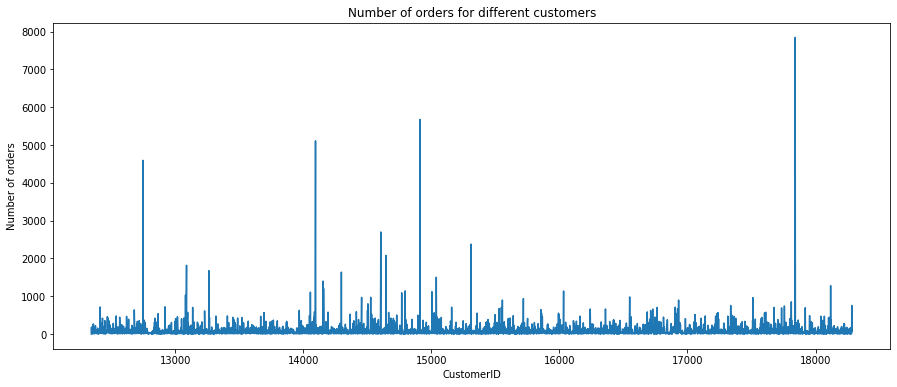

In [81]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)

plt.xlabel('CustomerID')
plt.ylabel('Number of orders')
plt.title('Number of orders for different customers')

plt.show()

## How much money spent by each customer

In [82]:
df_new.groupby(by = ['CustomerID','Country']).sum()

,,year_month,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,Country,,,,,,,
12346,United Kingdom,201101,1,2,10,74215,1.04,77183.60
12347,Iceland,36598483,1383,441,2219,2458,481.21,4310.00
12348,Finland,6232657,257,111,472,2341,178.71,1797.24
12349,Italy,14681103,803,73,657,631,605.10,1757.55
12350,Norway,3418734,34,51,272,197,65.30,334.40
...,...,...,...,...,...,...,...,...
18280,United Kingdom,2011030,30,10,90,45,47.65,180.60
18281,United Kingdom,1407742,42,49,70,54,39.36,80.82
18282,United Kingdom,2413316,116,60,146,103,62.39,178.05


In [83]:
df_new.groupby(by = ['CustomerID','Country'])['amount_spent'].sum()

CustomerID  Country       
12346       United Kingdom    77183.60
12347       Iceland            4310.00
12348       Finland            1797.24
12349       Italy              1757.55
12350       Norway              334.40
                                ...   
18280       United Kingdom      180.60
18281       United Kingdom       80.82
18282       United Kingdom      178.05
18283       United Kingdom     2094.88
18287       United Kingdom     1837.28
Name: amount_spent, Length: 4347, dtype: float64

In [84]:
money_spent = df_new.groupby(by = ['CustomerID','Country'], as_index = False)['amount_spent'].sum()

In [85]:
money_spent

,CustomerID,Country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


## Top 5 customers who spend highest money

In [86]:
money_spent.sort_values(by='amount_spent', ascending = False).head(10)

,CustomerID,Country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


## Visualizing - Money spent by different customers

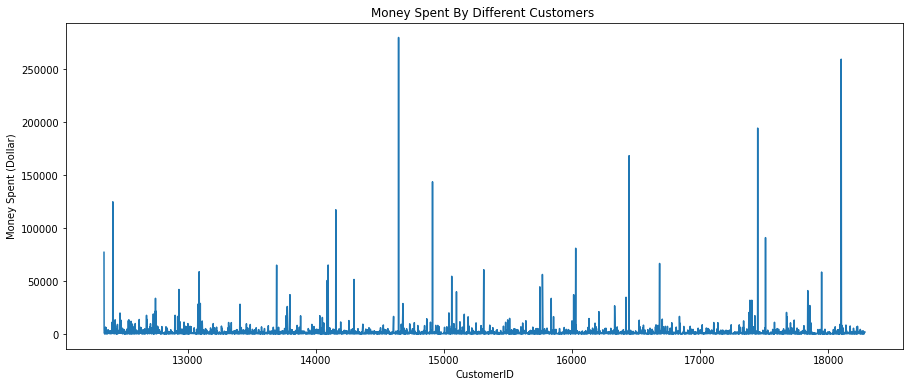

In [87]:
money_spent = df_new.groupby(by=['CustomerID','Country'],as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.amount_spent)

plt.xlabel('CustomerID')
plt.ylabel('Money Spent (Dollar)')
plt.title('Money Spent By Different Customers ')

plt.show()

In [88]:
df_new.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


## Number of orders for different months

In [89]:
color = sns.color_palette()

In [90]:
df_new.groupby('InvoiceNo')['year_month'].unique()

InvoiceNo
536365    [201012]
536366    [201012]
536367    [201012]
536368    [201012]
536369    [201012]
            ...   
581583    [201112]
581584    [201112]
581585    [201112]
581586    [201112]
581587    [201112]
Name: year_month, Length: 18536, dtype: object

In [91]:
df_new.groupby('InvoiceNo')['year_month'].unique().value_counts()

[201111]    2658
[201110]    1929
[201109]    1756
[201105]    1555
[201012]    1400
[201106]    1393
[201107]    1331
[201103]    1321
[201108]    1281
[201104]    1149
[201102]     998
[201101]     987
[201112]     778
Name: year_month, dtype: int64

In [92]:
df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: year_month, dtype: int64

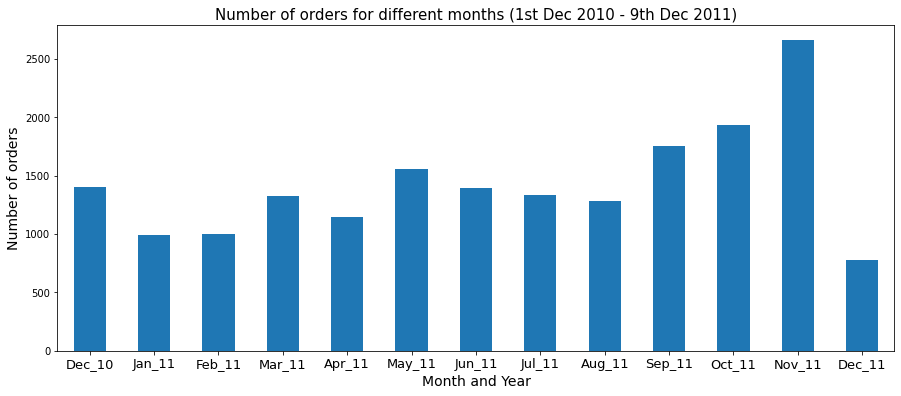

In [93]:
ax = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind ='bar',color=color[0],
                                                                                         figsize=(15,6))
ax.set_xlabel('Month and Year', fontsize=14)
ax.set_ylabel('Number of orders',fontsize=14)
ax.set_title('Number of orders for different months (1st Dec 2010 - 9th Dec 2011)', fontsize=15)

t = ('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11')

ax.set_xticklabels(t, rotation='horizontal', fontsize=13)

plt.show()

### How many orders (per day)?

In [95]:
df_new.groupby('InvoiceNo')['day'].unique()

InvoiceNo
536365    [3]
536366    [3]
536367    [3]
536368    [3]
536369    [3]
         ... 
581583    [5]
581584    [5]
581585    [5]
581586    [5]
581587    [5]
Name: day, Length: 18536, dtype: object

In [98]:
df_new.groupby('InvoiceNo')['day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

In [97]:
# most of the order on thursday

### Lets vizualize day wise sales

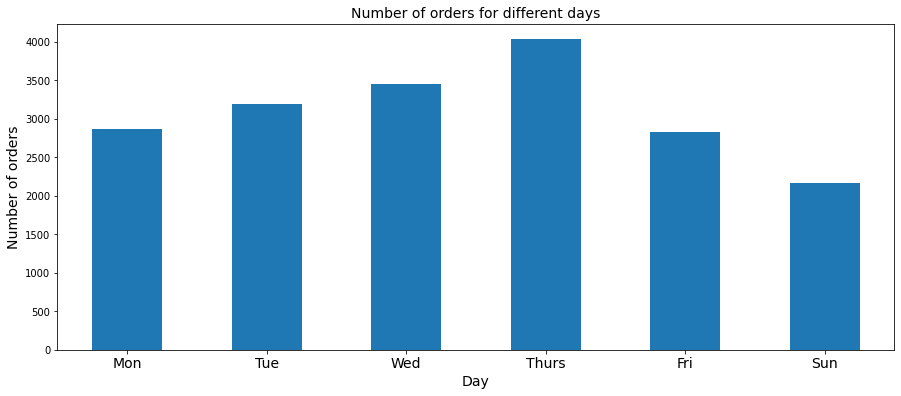

In [99]:
ax = df_new.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind = 'bar',color=color[0],figsize=(15,6))

ax.set_xlabel('Day',fontsize=14)
ax.set_ylabel('Number of orders', fontsize=14)
ax.set_title('Number of orders for different days', fontsize=14)
d = ('Mon','Tue','Wed','Thurs','Fri','Sun')
ax.set_xticklabels(d, rotation='horizontal',fontsize=14)
plt.show()

As shown in the plot number of orders more on Thursday.

## Discover patterns for Unit Price

In [101]:
df_new.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [102]:
df_new.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

## Min value for product is zero, so there are some free products

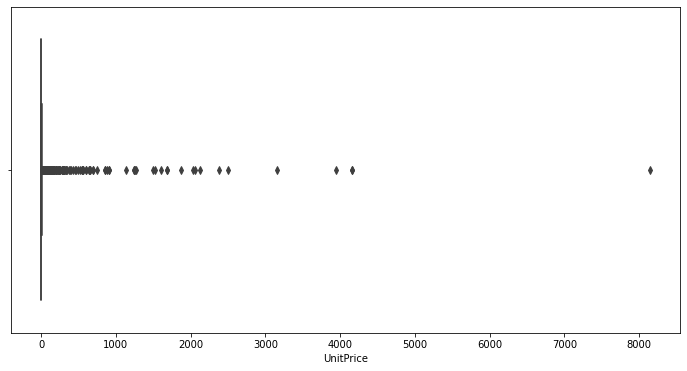

In [103]:
#Check the distribution of unit price
plt.subplots(figsize = (12,6))

sns.boxplot(df_new.UnitPrice)
plt.show()

## Filter only free products(cost=0)

In [104]:
df_free = df_new[df_new.UnitPrice == 0]

In [105]:
len(df_free)

40

In [106]:
df_free.year_month

9302      201012
33576     201012
40089     201012
47068     201101
47070     201101
56674     201101
86789     201102
130188    201103
139453    201103
145208    201104
157042    201104
187613    201105
198383    201105
279324    201107
282912    201107
285657    201108
298054    201108
314745    201108
314746    201108
314747    201108
314748    201108
358655    201109
361825    201109
379913    201110
395529    201110
420404    201110
436428    201111
436597    201111
436961    201111
439361    201111
446125    201111
446793    201111
446794    201111
454463    201111
454464    201111
479079    201111
479546    201111
480649    201111
485985    201111
502122    201111
Name: year_month, dtype: int64

In [107]:
df_free.year_month.value_counts()

201111    14
201108     6
201012     3
201101     3
201110     3
201103     2
201104     2
201105     2
201107     2
201109     2
201102     1
Name: year_month, dtype: int64

In [108]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

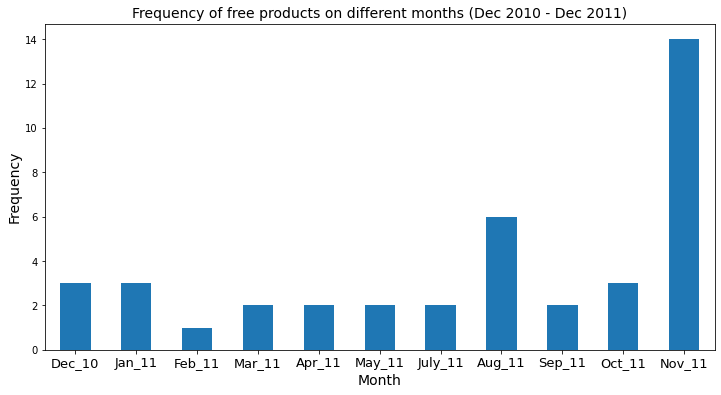

In [111]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6),color=color[0])
ax.set_xlabel('Month',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
ax.set_title('Frequency of free products on different months (Dec 2010 - Dec 2011)',fontsize=14)

m = ('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11')

ax.set_xticklabels(m, rotation='horizontal', fontsize=13)
plt.show()

## How many orders for each country?

In [112]:
df_new.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [113]:
df_new.groupby('Country')['InvoiceNo'].count().sort_values()

Country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                244
Israel                     248
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1462
Switzerland               1842
Belgium                   2031
Netherlands               2363


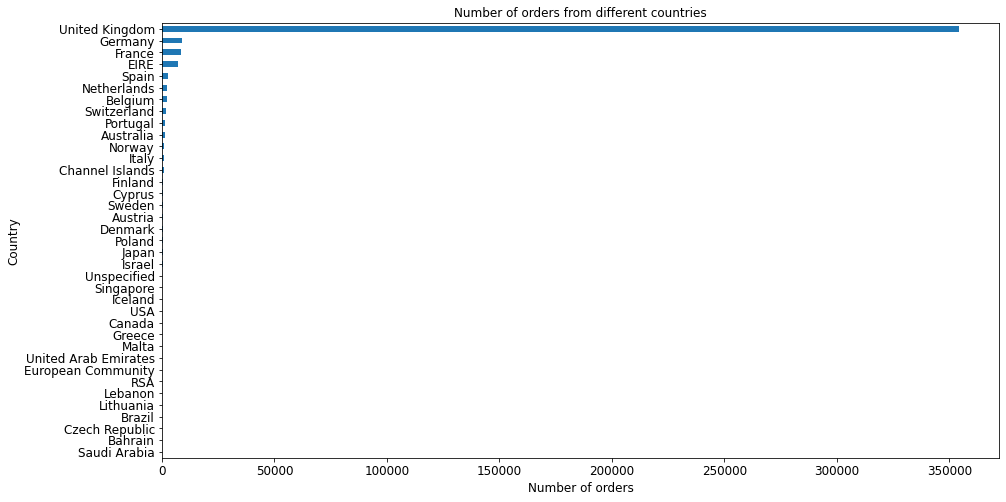

In [115]:
# Lets vizualize orders from countries

group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize = (15,8))
group_country_orders.plot(kind='barh',fontsize=12,color=color[0])

plt.xlabel('Number of orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of orders from different countries', fontsize=12)
plt.show()

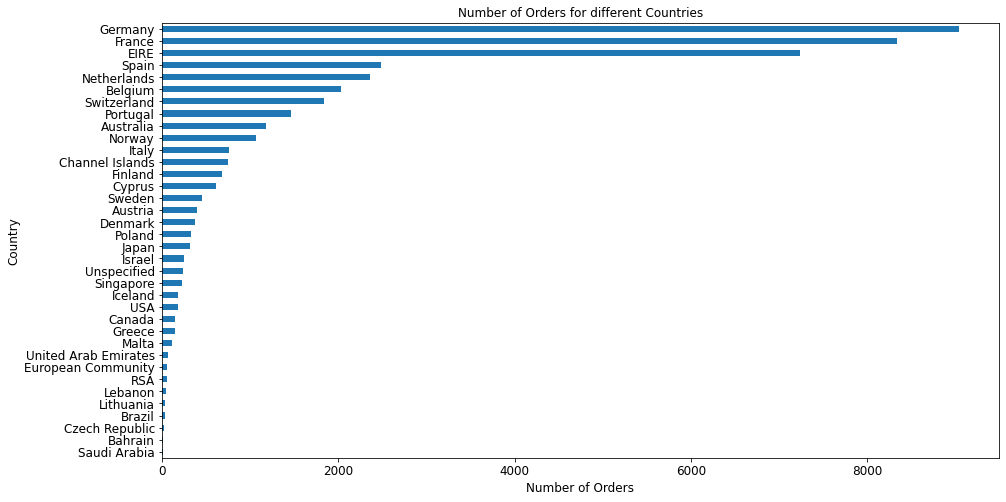

In [118]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

## Money spent by each country

In [119]:
df_new

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,201112,12,5,12,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France
541905,581587,2011-12-09 12:50:00,201112,12,5,12,22899,children's apron dolly girl,6,2.10,12.60,12680,France
541906,581587,2011-12-09 12:50:00,201112,12,5,12,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France
541907,581587,2011-12-09 12:50:00,201112,12,5,12,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France


In [120]:
df_new.groupby('Country')['amount_spent']

In [121]:
df_new.groupby('Country')['amount_spent'].sum()

Country
Australia                138521.310
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20450.440
Cyprus                    13590.380
Czech Republic              826.740
Denmark                   18955.340
EIRE                     265545.900
European Community         1300.250
Finland                   22546.080
France                   209024.050
Germany                  228867.140
Greece                     4760.520
Iceland                    4310.000
Israel                     7221.690
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal                  33439.890
RSA                 

In [122]:
df_new.groupby('Country')['amount_spent'].sum().sort_values()

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

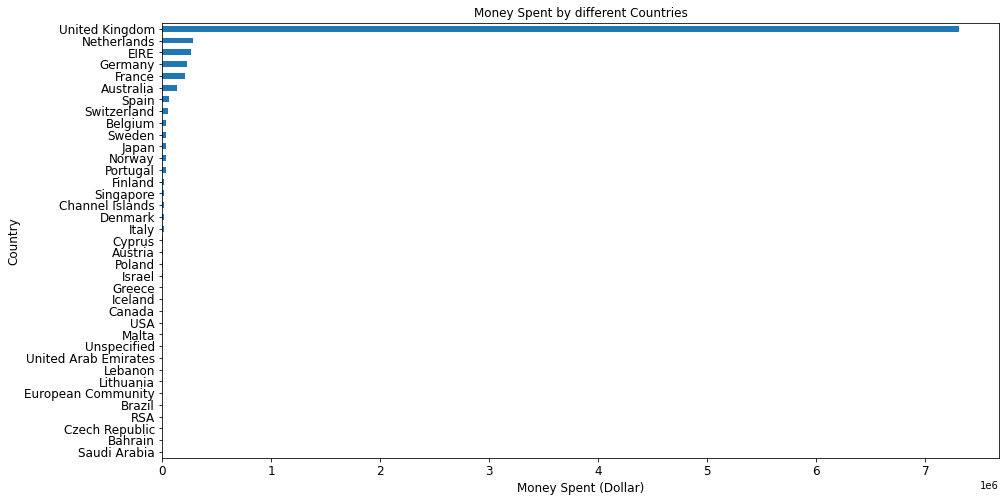

In [124]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

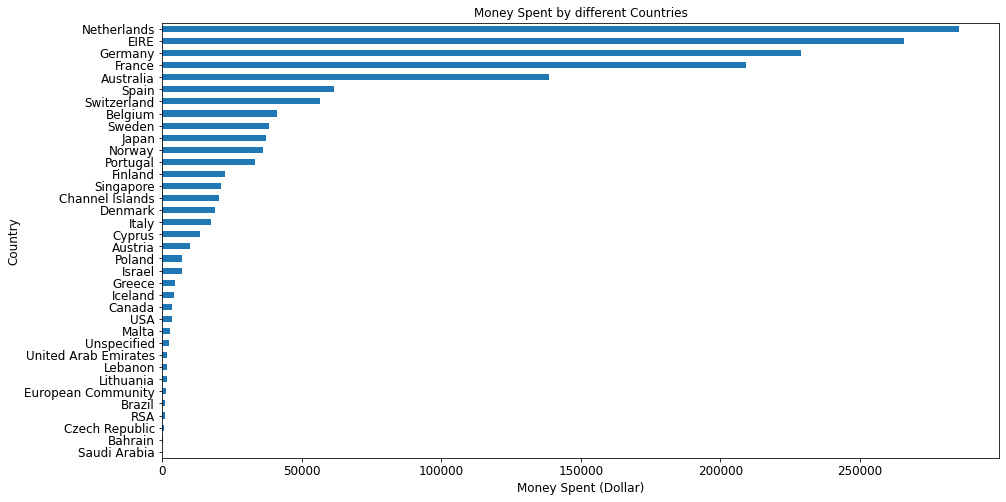

In [127]:
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()